In [159]:
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx

In [160]:
df = pd.read_csv('got_book_1.csv')

In [161]:
df.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [162]:
df.tail()

,Source,Target,Type,weight,book
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1
683,Waymar-Royce,Will-(prologue),Undirected,18,1


In [163]:
df.describe()

,weight,book
count,684.000000,684.0
mean,10.769006,1.0
std,17.294432,0.0
min,3.000000,1.0
25%,4.000000,1.0
50%,5.000000,1.0
75%,11.000000,1.0
max,291.000000,1.0


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  684 non-null    object
 1   Target  684 non-null    object
 2   Type    684 non-null    object
 3   weight  684 non-null    int64 
 4   book    684 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 26.8+ KB


In [165]:
#create a network of most important characters
df_imp = df.loc[df['weight'] > 30, :]


In [166]:
df_imp.describe()

,weight,book
count,48.000000,48.0
mean,56.145833,1.0
std,40.641656,0.0
min,31.000000,1.0
25%,35.500000,1.0
50%,42.000000,1.0
75%,64.250000,1.0
max,291.000000,1.0


In [167]:
#create a graph
G = nx.from_pandas_edgelist ( 
    df_imp, 
    source = 'Source',
    target = 'Target',
    edge_attr = 'weight',
)

In [168]:
#get the details of the graph 
print ('No of characters: ', len(G.nodes))
print ('No of edges: ', len(G.edges))

No of characters:  38
No of edges:  48


In [169]:
# all graph options
graphs_viz_options = [
    nx.draw, 
    nx.draw_networkx,
    nx.draw_circular, 
    nx.draw_kamada_kawai,
    nx.draw_random,
    nx.draw_shell,
    nx.draw_spring
]

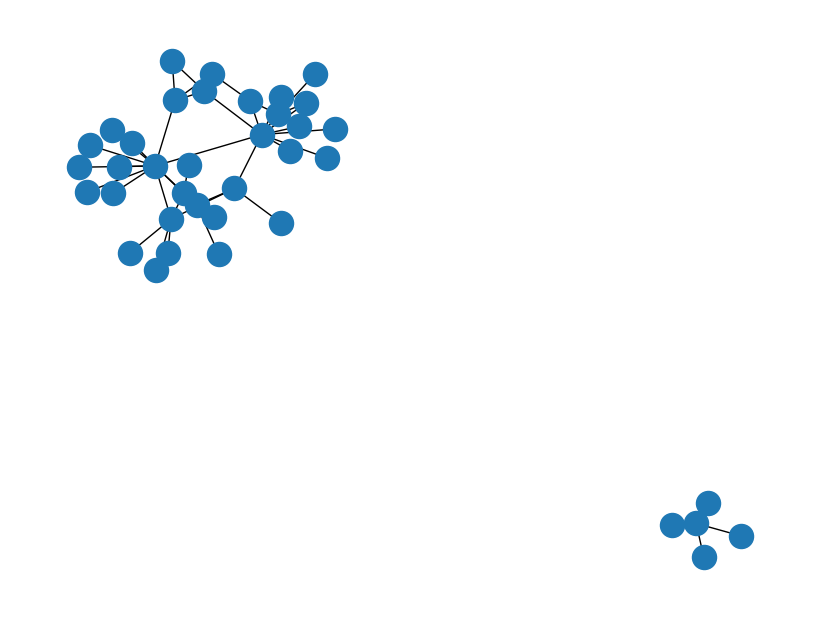

In [170]:
selected_graph_option = 0 
plt.figure (figsize = (8, 6), dpi = 100)
graphs_viz_options [selected_graph_option](G)

In [171]:
from pyvis.network import Network

In [172]:
net = Network(notebook = True,
                width = 1000, 
                height = 1000, 
                cdn_resources = 'in_line'
               )
                

In [173]:
net.from_nx(G)
net.show('GoT.html')

GoT.html
